In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
salary1 = pd.read_excel("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\NBA salaries.xlsx",sheet_name=None)
salary2 = pd.read_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\nba-salaries 2000-2020.csv")
salary_2024 = salary1['2024']
salary_2023 = salary1['2023']
salary_2022 = salary1['2022']
salary_2021 = salary1['2021']
salary_2022[['PLAYER','POSITION']] = salary_2022['NAME'].str.split(', ', expand=True)
salary_cap = pd.read_excel("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\salary_cap.xlsx")

# Rename the column names to be consistent
salary_2024 = salary_2024.rename(columns={"PLAYER":"player",salary_2024.columns[1]:"salary"}).loc[:,["player","salary"]]
salary_2024["season"] = 2024
salary_2023 = salary_2023.rename(columns={"PLAYER":"player",salary_2023.columns[1]:"salary"}).loc[:,["player","salary"]]
salary_2023["season"] = 2023
salary_2022 = salary_2022.rename(columns={"PLAYER":"player","SALARY":"salary"}).loc[:,["player","salary"]]
salary_2022["season"] = 2022
salary_2021 = salary_2021.rename(columns={"PLAYER":"player",salary_2021.columns[1]:"salary"}).loc[:,["player","salary"]]
salary_2021["season"] = 2021
salary2 = salary2.rename(columns={"name":"player"}).loc[:,["player","salary","season"]]

# Merge into one
salary = pd.concat([salary_2024,salary_2023,salary_2022,salary_2021,salary2],axis = 0)
salary['salary'] = pd.to_numeric(salary['salary'], errors='coerce', downcast='integer').round().astype('Int64')
salary = salary.merge(salary_cap,on="season")
salary.dropna(inplace=True)
salary['pct_cap'] = salary['salary']/salary['cap']

# Deal with inflation to salary number. Convert salary to 2023 dollar value.
# Load inflation and CPI data
cpi = pd.read_excel("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\cpi.xlsx",
                   header=None,
                   names = ["year","inflation","cpi"], 
                   dtype={"year":int,"inflation":float,"cpi":float}
)
cpi['season'] = cpi['year']+1

# Merge with salary dataset
salary_cpi = salary.merge(cpi.loc[:,['season','cpi']],how = "inner",on="season")
cpi_2024 = cpi['cpi'][cpi['season']==2024].values
salary_cpi['adjusted salary'] = salary_cpi["salary"]/salary_cpi["cpi"]*cpi_2024
salary_complete = salary_cpi.loc[:,["player","season","salary","adjusted salary","pct_cap","cap"]]


In [30]:
salary_complete

,player,season,salary,adjusted salary,pct_cap,cap
0,Stephen Curry,2024,51915615,51915615.0,0.381674,136021000
1,Kevin Durant,2024,47649433,47649433.0,0.350309,136021000
2,Nikola Jokic,2024,47607350,47607350.0,0.35,136021000
3,LeBron James,2024,47607350,47607350.0,0.35,136021000
4,Joel Embiid,2024,47607350,47607350.0,0.35,136021000
...,...,...,...,...,...,...
11648,Jimmer Fredette,2020,208509,242897.773051,0.00191,109140000
11649,Jontay Porter,2020,197933,230577.504632,0.001814,109140000
11650,Anthony Tolliver,2020,183115,213315.615691,0.001678,109140000
11651,Tyler Johnson,2020,183115,213315.615691,0.001678,109140000


In [23]:
salary_complete.to_csv("C:\\Users\\17667\\Desktop\\Python\\NYU Python course\\project\\NBA data\\salary\\salary.csv")

In [31]:
salary_complete[salary_complete['player']=='Kobe Bryant']

,player,season,salary,adjusted salary,pct_cap,cap
2215,Kobe Bryant,2000,9000000,16137034.716219,0.264706,34000000
2384,Kobe Bryant,2001,10125000,17763369.91756,0.285211,35500000
2750,Kobe Bryant,2002,11250000,19088082.868644,0.264706,42500000
3163,Kobe Bryant,2003,12375000,20424991.396409,0.307293,40271000
3440,Kobe Bryant,2004,13500000,21930914.169373,0.307938,43840000
3617,Kobe Bryant,2005,14625000,23224330.743063,0.333371,43870000
3731,Kobe Bryant,2006,15946875,24657695.175112,0.322159,49500000
4164,Kobe Bryant,2007,17718750,26496556.173557,0.333467,53135000
4634,Kobe Bryant,2008,19490625,28242453.285768,0.350362,55630000
5124,Kobe Bryant,2009,21262500,29970767.547684,0.362347,58680000


<AxesSubplot:xlabel='season'>

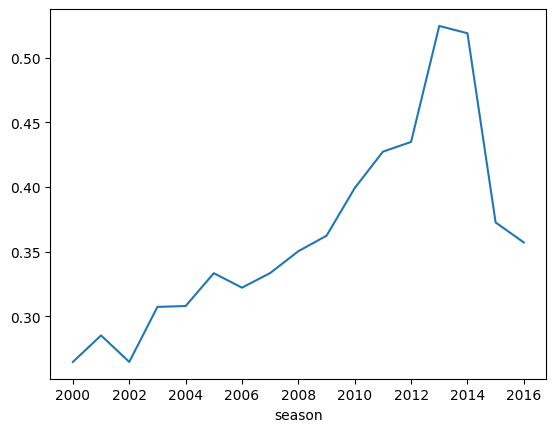

In [26]:
salary_cpi.groupby(by=['player','season']).mean().loc['Kobe Bryant','pct_cap'].plot()